In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import shapiro
from patsy import dmatrices
from IPython.display import display
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

Exercício 22 - 4, 5 e 6 - Regressão linear - Exercícios.docx

Bário Silva está interessado em testar a seguinte hipótese: o nível de satisfação dos funcionários de uma empresa depende do seu tamanho, de maneira que empresas maiores teriam nível de satisfação médio mais elevado. Bário decidiu medir o tamanho da empresa pelo número de funcionários. Ele coletou os seguintes dados de uma amostra aleatória de 100 empresas: grau de satisfação médio dos funcionários – medido em uma escala de 0 a 7000 (satisfação), ativo total da empresa no momento da pesquisa em 1.000 reais (ativo), número de funcionários da empresa (num_func) e investimento em treinamento nos últimos 12 meses em 1.000 reais (inv_trein). Há evidências que apoiem a hipótese de Bário? Justifique claramente e de maneira detalhada a resposta com argumentos estatísticos.

In [2]:
## Importando a base
base = pd.read_excel('5 - Regressão linear - Exercícios - Dados.xlsx', sheet_name="Bario")
base

,Id,Satisfacao,Ativos,Num_func,inv_trein
0,1,1900,12858,356,4887
1,2,4600,199532,696,3499
2,3,5200,182560,677,4983
3,4,4000,191333,939,916
4,5,3700,184105,788,3360
...,...,...,...,...,...
95,96,5100,213721,1086,3609
96,97,4100,181576,869,572
97,98,1600,68754,75,4725
98,99,6300,299288,1403,4204


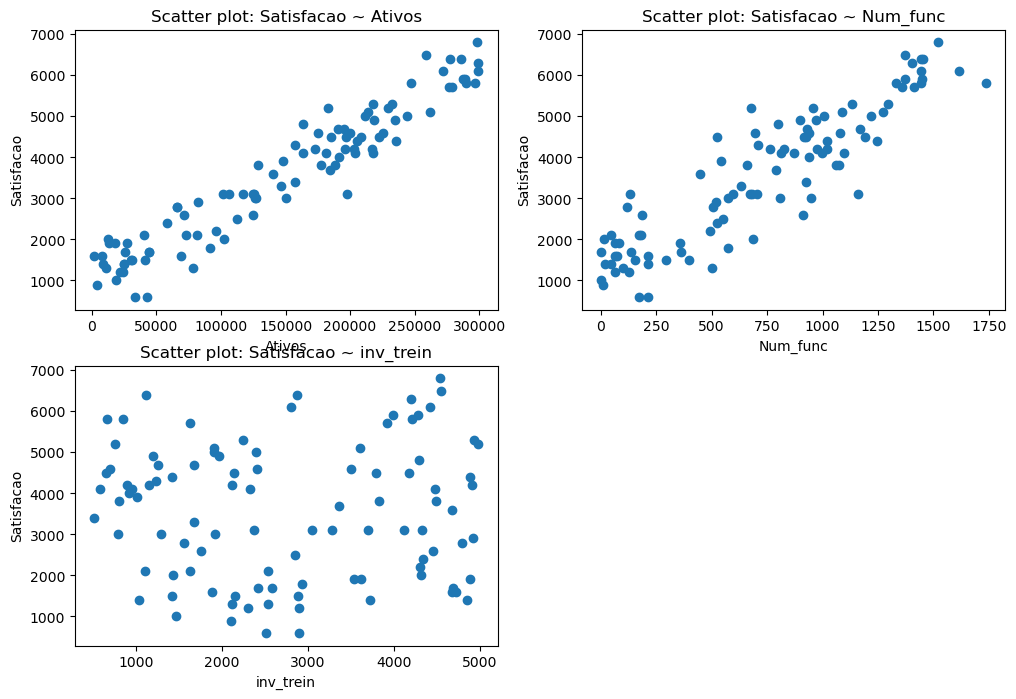

In [8]:
# Descriptive Statistics

scatter_plots = ['Ativos', 'Num_func', 'inv_trein']
plt.figure(figsize=(12, 8))
for i, var in enumerate(scatter_plots, 1):
    plt.subplot(2, 2, i)
    plt.scatter(base[var], base['Satisfacao'])
    plt.xlabel(var)
    plt.ylabel('Satisfacao')
    plt.title(f'Scatter plot: Satisfacao ~ {var}')
    plt.plot()

In [9]:
# Correlation Matrix
correlation_matrix = base[['Satisfacao', 'Ativos', 'Num_func', 'inv_trein']].corr()
print(correlation_matrix)

            Satisfacao    Ativos  Num_func  inv_trein
Satisfacao    1.000000  0.957483  0.903077  -0.004224
Ativos        0.957483  1.000000  0.948259  -0.112993
Num_func      0.903077  0.948259  1.000000  -0.120310
inv_trein    -0.004224 -0.112993 -0.120310   1.000000


#### MODELOS PARA EXPLICAR A VARIÂNCIA DA SATISFAÇÃO - COM PROBLEMAS DE MULTICOLINEARIDADE

In [10]:
## Modelo 1
modelo1 = ols('Satisfacao~Num_func+Ativos + inv_trein', data=base).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:             Satisfacao   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     411.5
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.20e-54
Time:                        08:20:22   Log-Likelihood:                -749.90
No. Observations:                 100   AIC:                             1508.
Df Residuals:                      96   BIC:                             1518.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    642.0635    129.230      4.968      0.0

#### MODELOS CONSIDERANDO SOMENTE AS VARIÁVEIS INDEPENDENTES PARA O CÁLCULO DO VIF (VARIANCE INFLATION FACTOR)

In [11]:
## Modelos IVs - 1 
modelo1_iv = ols('Ativos ~ Num_func + inv_trein', data=base).fit()
print(modelo1_iv.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ativos   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.66e-49
Time:                        08:20:29   Log-Likelihood:                -1168.1
No. Observations:                 100   AIC:                             2342.
Df Residuals:                      97   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.341e+04   8306.096      1.615      0.1

In [12]:
## Modelos IVs - 2 
modelo2_iv = ols('Num_func ~ Ativos + inv_trein', data=base).fit()
print(modelo2_iv.summary())

                            OLS Regression Results                            
Dep. Variable:               Num_func   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     433.5
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.29e-49
Time:                        08:20:34   Log-Likelihood:                -641.83
No. Observations:                 100   AIC:                             1290.
Df Residuals:                      97   BIC:                             1297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8495     43.579      0.455      0.6

In [13]:
## Modelos IVs - 3 
modelo3_iv = ols('inv_trein ~ Ativos + Num_func', data=base).fit()
print(modelo3_iv.summary())

                            OLS Regression Results                            
Dep. Variable:              inv_trein   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7129
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.493
Time:                        08:20:36   Log-Likelihood:                -865.50
No. Observations:                 100   AIC:                             1737.
Df Residuals:                      97   BIC:                             1745.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3022.5189    269.526     11.214      0.0

In [16]:
VIF_ativos=1/(1-modelo1_iv.rsquared)
VIF_nfunc=1/(1-modelo2_iv.rsquared)
VIF_invtreina=1/(1-modelo3_iv.rsquared)

print(VIF_ativos, VIF_nfunc,VIF_invtreina)

9.92024269889458 9.937427036648574 1.0146993222453697


#### CÓDIGO PARA CALCULAR O VIF

In [17]:
# Código para o cálculo do VIF => UTILIZAR ESTE, MAS COMPREENDER COMO OS CÁLCULOS SÃO FEITOS
X_variables = base[['Ativos', 'Num_func', 'inv_trein']]
X_variables['constante']=1

vif_data = pd.DataFrame()
vif_data["variaveis_independentes"] = X_variables.columns
vif_data["VIF"] = [vif(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data[:-1]

,variaveis_independentes,VIF
0,Ativos,9.920243
1,Num_func,9.937427
2,inv_trein,1.014699


#### MODELOS PARA EXPLICAR A VARIÂNCIA DA SATISFAÇÃO - SEM PROBLEMAS DE MULTICOLINEARIDADE

In [18]:
## Modelo 2 => excluindo a variável número de funcionários
modelo2 = ols('Satisfacao~Ativos+ inv_trein', data=base).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:             Satisfacao   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.59e-56
Time:                        08:22:04   Log-Likelihood:                -749.99
No. Observations:                 100   AIC:                             1506.
Df Residuals:                      97   BIC:                             1514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    639.6752    128.531      4.977      0.0

In [19]:
# Código para o cálculo do VIF => UTILIZAR ESTE, MAS COMPREENDER COMO OS CÁLCULOS SÃO FEITOS
X_variables = base[['Ativos','inv_trein']]
X_variables['constante']=1

vif_data = pd.DataFrame()
vif_data["variaveis_independentes"] = X_variables.columns
vif_data["VIF"] = [vif(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data[:-1]

,variaveis_independentes,VIF
0,Ativos,1.012932
1,inv_trein,1.012932


In [20]:
## Modelo 3 - excluindo a variável ativos
modelo3 = ols('Satisfacao~Num_func+ inv_trein', data=base).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:             Satisfacao   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.24e-37
Time:                        08:22:11   Log-Likelihood:                -793.74
No. Observations:                 100   AIC:                             1593.
Df Residuals:                      97   BIC:                             1601.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    884.7270    196.663      4.499      0.0

In [37]:
# Código para o cálculo do VIF => UTILIZAR ESTE, MAS COMPREENDER COMO OS CÁLCULOS SÃO FEITOS
X_variables = base[['Num_func','inv_trein']]
X_variables['constante']=1

vif_data = pd.DataFrame()
vif_data["variaveis_independentes"] = X_variables.columns
vif_data["VIF"] = [vif(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data[:-1]

,variaveis_independentes,VIF
0,Num_func,1.014687
1,inv_trein,1.014687


## Exportar os resultados dos modelos para o excel

In [60]:
# Modelos de regressão

#!pip install stargazer

from stargazer.stargazer import Stargazer
from IPython.display import HTML
import pandas as pd

# Gera Stargazer
starg = Stargazer([modelo1, modelo2, modelo3])
starg.custom_columns(['(1)', '(2)', '(3)'], [1,1,1])
starg.covariate_order(["Ativos", "Num_func", "inv_trein", "Intercept"])

# Renderiza HTML
html = starg.render_html()

# Converte HTML para DataFrame
df = pd.read_html(html)[0]

# Salva no Excel
df.to_excel("tabela_regressao.xlsx", index=False)

display(HTML(html))          # EXIBE HTML


# Premisass do modelo de regressão 
### Considerando o Modelo 3 como o final!

As premissas precisam ser atendidas para que os resultados do teste sejam considerados válidos.

### Independência do erros
Este pressuposto é testado quando o estudo é planejado. Isso significa que todos os grupos são mutuamente exclusivos, ou seja, um indivíduo só pode pertencer a um grupo. Além disso, isso significa que os dados não são medidas repetidas (não coletadas ao longo do tempo).

### Normalidade dos erros

O pressuposto de normalidade é testado nos resíduos (amostra) do modelo quando provenientes de uma ANOVA ou regressão. Um método para testar o pressuposto de normalidade é o teste de Shapiro-Wilk. Infelizmente, a saída não está rotulada, mas é a estatística de teste W e valor-p, respectivamente.

In [61]:
# Teste de normalidade de Shapiro-Wilk

#H0: Os erros (população) seguem uma distribuição normal 
#Estatística do teste W e valor-p, respectivamente

print(shapiro(modelo3.resid))

ShapiroResult(statistic=np.float64(0.9917986465332658), pvalue=np.float64(0.8064539333246975))


In [62]:
modelo3.resid

0     -721.733712
1     1065.692031
2     1543.336007
3        9.570080
4     -110.399504
         ...     
95     309.117974
96     375.075845
97    -106.157278
98     425.431392
99     -77.355478
Length: 100, dtype: float64

(array([ 2.,  5.,  5., 16., 11., 24., 18., 10.,  6.,  3.]),
 array([-1770.46404674, -1439.08404136, -1107.70403597,  -776.32403059,
         -444.94402521,  -113.56401982,   217.81598556,   549.19599094,
          880.57599633,  1211.95600171,  1543.3360071 ]),
 <BarContainer object of 10 artists>)

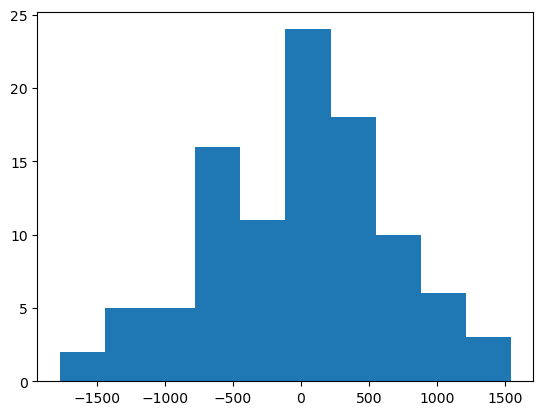

In [44]:
plt.hist(modelo3.resid)

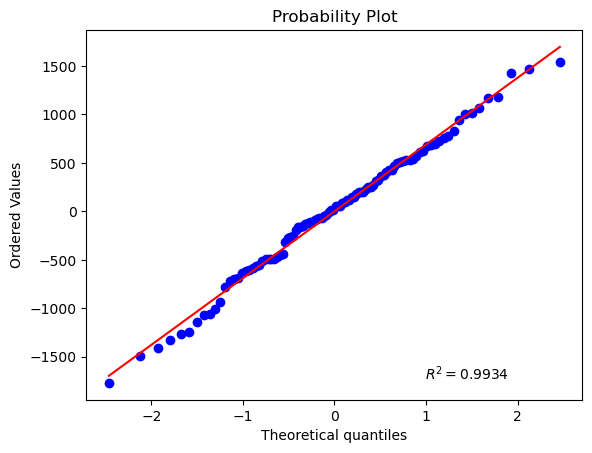

In [45]:
normality_plot, stat = stats.probplot(modelo3.resid, plot= plt, rvalue= True)

### Homoscedasticidade
O último pressuposto é variância dos erros é homoscesdástica em função da variável independente

Text(0, 0.5, 'Resíduos')

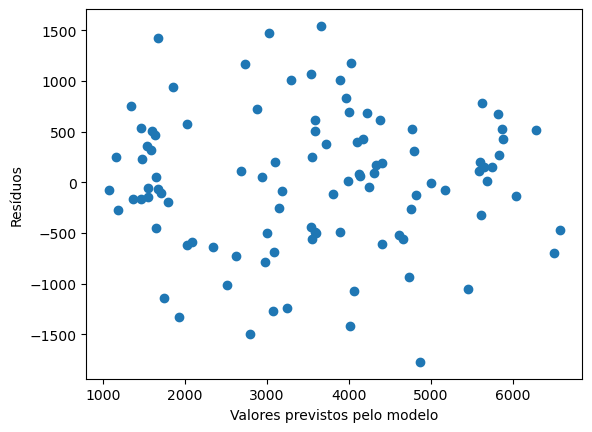

In [46]:
## Plotar os residuos em função das variaveis dependentes

## Scatter Plot com linha de regressão
plt.scatter(modelo3.fittedvalues, modelo3.resid)
plt.xlabel('Valores previstos pelo modelo')
plt.ylabel('Resíduos')

In [47]:
## Teste de Breusch-Pagan 
#H0: A variância dos erros (população) é constante (homoscedasticidade)

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
 
# Get the test result
test_result = het_breuschpagan(modelo3.resid, modelo3.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', np.float64(0.28847636228782614)),
 ('p-value', np.float64(0.8656815344839395))]

In [48]:
# Caso resíduos heteroscedáticos. Estimar o modelo com erros-padrões robustos

# Modelo OLS com erros robustos
modelo_robusto = modelo3.get_robustcov_results(cov_type='HC3')

# Exibindo o resumo com erros robustos
print(modelo_robusto.summary())

                            OLS Regression Results                            
Dep. Variable:             Satisfacao   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     330.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           5.11e-44
Time:                        08:37:20   Log-Likelihood:                -793.74
No. Observations:                 100   AIC:                             1593.
Df Residuals:                      97   BIC:                             1601.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    884.7270    177.736      4.978      0.0